In [1]:
!sudo apt-get update
!apt install imagemagick

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,047 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,675 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:

In [2]:
!pip install 'gym[all]' pygame 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py

In [3]:
import numpy as np
import gym
import os
import tqdm
import matplotlib.pyplot as plt

from IPython.display import Image
from matplotlib import animation
from tqdm.notebook import tqdm

In [7]:
env_id = 'Taxi-v3'  
env = gym.make(env_id, render_mode='rgb_array', new_step_api=True)
state_space = env.observation_space.n
action_space = env.action_space.n
print('Observation Space:', state_space)
print('Action Space Shape:', action_space)

Observation Space: 500
Action Space Shape: 6


In [5]:
def init_q_table(state_space, action_space):
    q_table = np.zeros(
        (state_space, action_space)
    )

    return q_table

def greedy_policy(q_table, state):
    action = np.argmax(q_table[state, :])

    return action

def epsilon_greedy_policy(q_table, state, epsilon):
    rand_n = float(np.random.uniform(0, 1))
    
    if rand_n > epsilon:
        action = greedy_policy(q_table, state)
    else:
        action = np.random.choice(q_table.shape[1])

    return action

In [ ]:
n_training_episodes = 30000
n_eval_episodes = 100   
lr = 0.7

max_steps = 99  
gamma = 0.95  
eval_seed = range(n_eval_episodes)

max_epsilon = 1.0  
min_epsilon = 0.05 
decay_rate = 0.0005  

In [ ]:
def train(
    env,
    max_steps,
    q_table,
    n_training_episodes,
    min_epsilon,
    max_epsilon,
    decay_rate,
    lr,
    gamma
):
    for episode in tqdm(range(n_training_episodes)):
        epsilon = min_epsilon + \
                  (max_epsilon - min_epsilon) * \
                  np.exp(-decay_rate * episode)

        state, info = env.reset()
        step = 0
        terminated = False
        truncated = False

        for step in range(max_steps):
            action = epsilon_greedy_policy(
                q_table,
                state, 
                epsilon
            )
            new_state, reward, terminated, truncated, info = env.step(action)

            q_table[state, action] = q_table[state, action] + lr * (
                reward + \
                gamma * \
                np.max(q_table[new_state]) - q_table[state, action]
            )

            if terminated or truncated:
                break

            state = new_state

    return q_table

In [ ]:
q_table = init_q_table(state_space, action_space)
trained_q_table = train(
    env, 
    max_steps, 
    q_table,
    n_training_episodes, 
    min_epsilon, 
    max_epsilon, 
    decay_rate, 
    lr,
    gamma
)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [ ]:
trained_q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.75200369,  3.94947757,  2.75200369,  3.94947757,  5.20997639,
        -5.05052243],
       [ 7.93349184,  9.40367562,  7.93349184,  9.40367562, 10.9512375 ,
         0.40367562],
       ...,
       [10.94641326, 12.58025   , 10.95120624,  9.40285092,  1.95106598,
         1.94641322],
       [ 5.20994798,  6.53588858,  5.20997639,  6.53681725, -3.79003729,
        -3.79002537],
       [16.1       , 14.295     , 16.1       , 18.        ,  7.1       ,
         7.1       ]])

In [ ]:
def evaluate_agent(
    env,
    max_steps, 
    n_eval_episodes, 
    q_table, 
    seed
):

    episode_rewards = []

    for episode in tqdm(range(n_eval_episodes)):
        if seed:
            state, info = env.reset(seed=seed[episode])
        else:
            state, info = env.reset()

        step = 0
        truncated = False
        terminated = False
        total_rewards_ep = 0

        for step in range(max_steps):
            action = greedy_policy(q_table, state)
            new_state, reward, terminated, truncated, info = env.step(action)
            total_rewards_ep += reward

            if terminated or truncated:
                break

            state = new_state

        episode_rewards.append(total_rewards_ep)

    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward

In [ ]:
mean_reward, std_reward = evaluate_agent(
    env, 
    max_steps, 
    n_eval_episodes, 
    q_table, 
    eval_seed
)
print(f"Mean_reward={mean_reward:.4f} +/- {std_reward:.4f}")

  0%|          | 0/100 [00:00<?, ?it/s]

Mean_reward=7.6900 +/- 2.8660


In [ ]:
model = {
    "env_id": env_id,
    "max_steps": max_steps,
    "n_training_episodes": n_training_episodes,
    "n_eval_episodes": n_eval_episodes,
    "eval_seed": eval_seed,
    "learning_rate": lr,
    "gamma": gamma,
    "max_epsilon": max_epsilon,
    "min_epsilon": min_epsilon,
    "decay_rate": decay_rate,
    "qtable": q_table
}

In [ ]:
def save_frames_as_gif(
    frames, 
    path='./', 
    filename='demo.gif',
    fps=1
):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=fps)
    plt.close()

Total rewards: 5


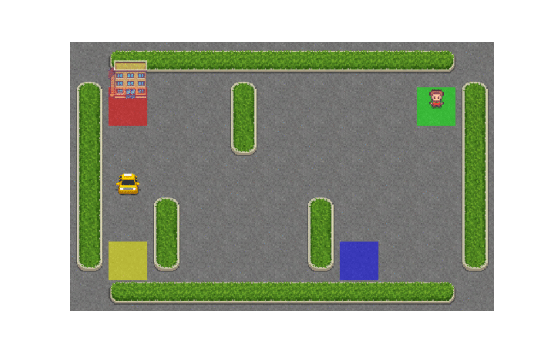

In [ ]:
def record_video(
    env, 
    q_table
):
    images = []  
    terminated = False
    truncated = False

    state, info = env.reset(seed=np.random.randint(0,500))
    img = env.render()
    images.append(img)
    total_rewards = 0

    while not terminated or truncated:
        action = greedy_policy(q_table, state) 
        state, reward, terminated, truncated, info = env.step(action)
        total_rewards += reward
        img = env.render()
        
        images.append(img)

    save_frames_as_gif(images)

    print('Total rewards:', total_rewards)

record_video(
    env,
    q_table
)

Image(open('demo.gif','rb').read())